In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(393, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           393 non-null    object
 1   discipline     393 non-null    object
 2   yrs.since.phd  393 non-null    int64 
 3   yrs.service    393 non-null    int64 
 4   sex            393 non-null    object
 5   salary         393 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.5+ KB


In [8]:
import seaborn as sns

Male      354
Female     39
Name: sex, dtype: int64


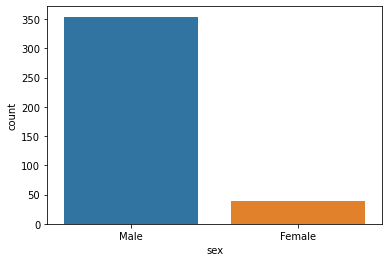

In [9]:
ax = sns.countplot(x = 'sex', data = df)
print(df['sex'].value_counts())

Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64


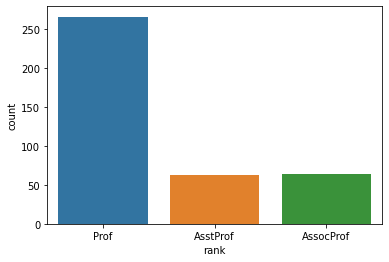

In [10]:
ax = sns.countplot(x = 'rank', data = df)
print(df['rank'].value_counts())

B    212
A    181
Name: discipline, dtype: int64


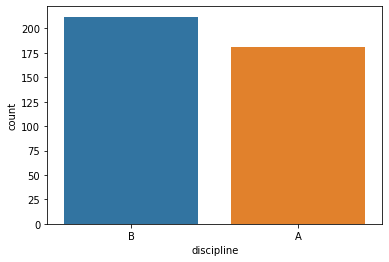

In [11]:
ax = sns.countplot(x = 'discipline', data = df)
print(df['discipline'].value_counts())

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [261]:
onc= OrdinalEncoder()

In [262]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = onc.fit_transform(df[i].values.reshape(-1,1))

In [263]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [13]:
rank = df.groupby("rank").mean()
rank

,yrs.since.phd,yrs.service,salary
rank,,,
AssocProf,15.453125,11.953125,93876.437500
AsstProf,5.190476,2.285714,80084.904762
Prof,28.300752,22.815789,126772.109023


In [14]:
rank_dict = {"Prof": 3, "AssocProf" : 2, "AsstProf" : 1}
updated_data = df.copy()
updated_data["rank"] = updated_data["rank"].map(rank_dict)
updated_rank = updated_data.groupby("rank").mean()
updated_rank

,yrs.since.phd,yrs.service,salary
rank,,,
1,5.190476,2.285714,80084.904762
2,15.453125,11.953125,93876.437500
3,28.300752,22.815789,126772.109023


In [15]:
discipline = df.groupby("discipline").mean()
discipline

,yrs.since.phd,yrs.service,salary
discipline,,,
A,25.381215,19.950276,108548.430939
B,20.047170,15.882075,118526.207547


In [16]:
discipline_dict = {"A": 1, "B" : 2}
updated_data["discipline"] = updated_data["discipline"].map(discipline_dict)
updated_discipline = updated_data.groupby("discipline").mean()
updated_discipline

,rank,yrs.since.phd,yrs.service,salary
discipline,,,,
1,2.59116,25.381215,19.950276,108548.430939
2,2.45283,20.047170,15.882075,118526.207547


In [17]:
sex = df.groupby("sex").mean()
sex

,yrs.since.phd,yrs.service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,23.163842,18.437853,115355.163842


In [18]:
sex_dict = {"Female": 1, "Male" : 2}
updated_data["sex"] = updated_data["sex"].map(sex_dict)
updated_sex = updated_data.groupby("sex").mean()
updated_sex

,rank,discipline,yrs.since.phd,yrs.service,salary
sex,,,,,
1,2.179487,1.538462,16.512821,11.564103,101002.410256
2,2.553672,1.539548,23.163842,18.437853,115355.163842


In [19]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           393 non-null    int64
 1   discipline     393 non-null    int64
 2   yrs.since.phd  393 non-null    int64
 3   yrs.service    393 non-null    int64
 4   sex            393 non-null    int64
 5   salary         393 non-null    int64
dtypes: int64(6)
memory usage: 29.6 KB


In [22]:
updated_data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.091299,0.693097,0.602392,0.148137,0.616490
discipline,-0.091299,1.000000,-0.207739,-0.156227,0.000652,0.164018
yrs.since.phd,0.693097,-0.207739,1.000000,0.908882,0.155373,0.414042
yrs.service,0.602392,-0.156227,0.908882,1.000000,0.158334,0.329624
sex,0.148137,0.000652,0.155373,0.158334,1.000000,0.141521
salary,0.616490,0.164018,0.414042,0.329624,0.141521,1.000000


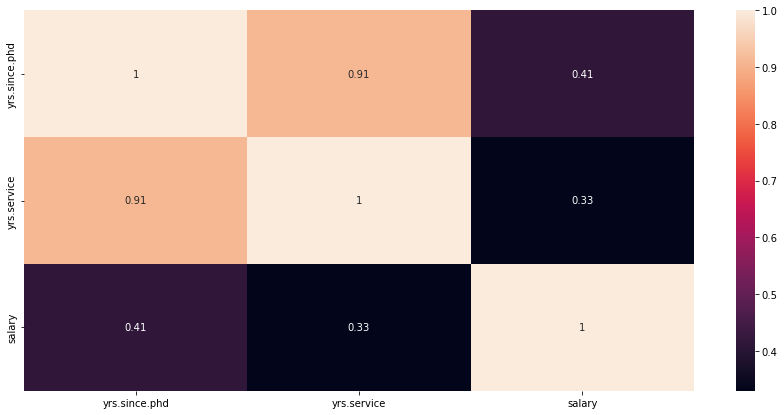

In [23]:
import matplotlib.pyplot as plt
df_corr = df.corr().abs()
plt.figure(figsize=(15,7))
sns.heatmap(df_corr,annot = True, annot_kws={'size':10})
plt.show()

In [20]:
X = updated_data[['rank','discipline','yrs.since.phd','yrs.service','sex']]
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,3,2,19,18,2
1,3,2,20,16,2
2,1,2,4,3,2
3,3,2,45,39,2
4,3,2,40,41,2
...,...,...,...,...,...
392,3,1,33,30,2
393,3,1,31,19,2
394,3,1,42,25,2
395,3,1,25,15,2


In [24]:
y = updated_data[["salary"]]
y

,salary
0,139750
1,173200
2,79750
3,115000
4,141500
...,...
392,103106
393,150564
394,101738
395,95329


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 80)

In [35]:
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(i)

186
349
458
646
775
961


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 186)

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_prediction = lr.predict(X_test)
y_prediction[:5]

array([[116716.16035516],
       [122796.17401312],
       [131311.51705277],
       [ 71128.99547445],
       [130176.20673147]])

In [40]:
import math

In [42]:
RMSE = math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
RMSE

22852.044654600533

In [43]:
r_squared = lr.score(X_test,y_test)
r_squared

0.43862109137256633

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 384)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

C:\Users\prath\AppData\Local\Temp/ipykernel_12248/2001991772.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

In [51]:
y_prediction = rfr.predict(X_test)
y_prediction[:5]

array([100037.14      , 143296.43166667, 144111.13333333, 102372.5       ,
       116317.48      ])

In [52]:
RMSE = math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
RMSE

22832.295603323044

In [53]:
r_squared = rfr.score(X_test,y_test)
r_squared

0.3835393534899134